In [1]:
from LRGradientDescent import LogisticRegressionGradientDescent as LRGD
from LRGradientDescentWithFeatureTransform import LRGDWithFeatureTransform as LRGDF
from show_images import show_images
import numpy as np
from scipy.special import logsumexp
from scipy.special import expit as sigm #sigmoid function
from numpy import genfromtxt
from matplotlib import pyplot as plt

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import sklearn.linear_model
import sklearn.tree
import sklearn.metrics

from scipy.special import expit as sigm
from numpy.random import randint

In [2]:
x= genfromtxt('data_sneaker_vs_sandal/x_train.csv', delimiter=',')[1:]
#xbias_NG = lr.insert_final_col_of_all_ones(x_all)
y= genfromtxt('data_sneaker_vs_sandal/y_train.csv', delimiter=',')[1:]

In [3]:
print(x.shape, y.shape)

(12000, 784) (12000,)


In [4]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    ''' Compute counts of four possible outcomes of a binary classifier for evaluation.
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : float
        Number of true positives
    TN : float
        Number of true negatives
    FP : float
        Number of false positives
    FN : float
        Number of false negatives
    '''
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    FP_id=[]
    FN_id=[]
    l=ytrue_N.size
    for i in range(0,l):
        if (yhat_N[i]==1):
            if (ytrue_N[i]==1):
                TP=TP+1.0
            else:
                FP=FP+1.0
                #FP_id.append(i)
        else:
            if (ytrue_N[i]==0):
                TN=TN+1.0
            else:
                FN=FN+1.0
                #FN_id.append(i)      
    return TP, TN, FP, FN #, FP_id, FN_id

In [5]:
def make_noise(x,y):
    N=int(x[0,:].size)
    #print(N)
    x_all=x;
    y_all=y;
    x_on=0;
    for j in range(9):
        x_j=x
        for i in range(y.size):
            for k in range(randint(1,10)):
                pos=randint(0,N)
                x_j[i, pos]=1-x[i,pos]
        x_all=np.concatenate((x_all, x_j), axis=0)
        y_all=np.concatenate((y_all, y), axis=0)
        #print(x_all.shape)
    return x_all, y_all

In [6]:
x_n, y_n=make_noise(x,y)

In [7]:
print(x_n.shape, np.matrix(y_n).shape)
#all_D=np.column_stack((x_n, np.matrix(y_n)))

(120000, 784) (1, 120000)


In [8]:
# Reshuffle:
Data=np.concatenate((x_n, np.matrix(y_n).T), axis=1)
np.random.shuffle(Data)
x_n=Data[:,:-1]
y_n=np.asarray(Data[:,-1]).reshape(-1)

In [9]:
va_rate=0.3
x_va=x_n[:int(np.ceil(va_rate*y_n.shape[0])),]
y_va=y_n[:int(np.ceil(va_rate*y_n.shape[0]))]
x_te=x_n[int(np.ceil(va_rate*y_n.shape[0])):,]
y_te=y_n[int(np.ceil(va_rate*y_n.shape[0])):]

In [10]:
#Check
print (x_te.shape, y_te.shape)
print(y_n.shape)

(84000, 784) (84000,)
(120000,)


In [11]:
va_rate=0.3
x_va0=x[:int(np.ceil(va_rate*y.shape[0])),]
y_va0=y[:int(np.ceil(va_rate*y.shape[0]))]
x_te0=x[int(np.ceil(va_rate*y.shape[0])):,]
y_te0=y[int(np.ceil(va_rate*y.shape[0])):]
orig_lr1 = LRGDF(alpha=10.0, step_size=0.1)
orig_lr1.fit(x_te0, y_te0)

orig_lr0 = LRGD(alpha=10.0, step_size=0.1)
orig_lr0.fit(x_te0, y_te0)

Using Feature Turn_On and Average!
Ave Loaded
Initializing w_G with 1570 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.024436  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.926748  avg_L1_norm_grad         0.040185  w[0]   -0.000 bias    0.000
iter    2/1000000  loss         0.936689  avg_L1_norm_grad         0.044868  w[0]    0.002 bias    0.028
iter    3/1000000  loss         1.057079  avg_L1_norm_grad         0.067814  w[0]    0.000 bias    0.009
iter    4/1000000  loss         0.974083  avg_L1_norm_grad         0.061439  w[0]    0.003 bias    0.053
iter    5/1000000  loss         1.076026  avg_L1_norm_grad         0.069421  w[0]    0.001 bias    0.024
iter    6/1000000  loss         0.826795  avg_L1_norm_grad         0.048592  w[0]    0.004 bias    0.070
iter    7/1000000  loss         0.855146  avg_L1_norm_grad         0.052546  w[0]    0.002 bias 

iter 3000/1000000  loss         0.196837  avg_L1_norm_grad         0.000101  w[0]    0.036 bias    1.822
iter 3001/1000000  loss         0.196834  avg_L1_norm_grad         0.000101  w[0]    0.036 bias    1.822
iter 3100/1000000  loss         0.196529  avg_L1_norm_grad         0.000097  w[0]    0.036 bias    1.843
iter 3101/1000000  loss         0.196526  avg_L1_norm_grad         0.000097  w[0]    0.036 bias    1.844
iter 3200/1000000  loss         0.196245  avg_L1_norm_grad         0.000093  w[0]    0.037 bias    1.864
iter 3201/1000000  loss         0.196242  avg_L1_norm_grad         0.000093  w[0]    0.037 bias    1.864
iter 3300/1000000  loss         0.195981  avg_L1_norm_grad         0.000089  w[0]    0.037 bias    1.884
iter 3301/1000000  loss         0.195979  avg_L1_norm_grad         0.000089  w[0]    0.037 bias    1.884
iter 3400/1000000  loss         0.195736  avg_L1_norm_grad         0.000086  w[0]    0.038 bias    1.903
iter 3401/1000000  loss         0.195734  avg_L1_norm_g

iter 7000/1000000  loss         0.192501  avg_L1_norm_grad         0.000027  w[0]    0.047 bias    2.294
iter 7001/1000000  loss         0.192501  avg_L1_norm_grad         0.000027  w[0]    0.047 bias    2.294
iter 7100/1000000  loss         0.192476  avg_L1_norm_grad         0.000027  w[0]    0.047 bias    2.299
iter 7101/1000000  loss         0.192476  avg_L1_norm_grad         0.000027  w[0]    0.047 bias    2.299
iter 7200/1000000  loss         0.192452  avg_L1_norm_grad         0.000026  w[0]    0.047 bias    2.305
iter 7201/1000000  loss         0.192452  avg_L1_norm_grad         0.000026  w[0]    0.047 bias    2.305
iter 7300/1000000  loss         0.192429  avg_L1_norm_grad         0.000025  w[0]    0.047 bias    2.310
iter 7301/1000000  loss         0.192429  avg_L1_norm_grad         0.000025  w[0]    0.047 bias    2.310
iter 7400/1000000  loss         0.192408  avg_L1_norm_grad         0.000025  w[0]    0.047 bias    2.315
iter 7401/1000000  loss         0.192407  avg_L1_norm_g

iter 10900/1000000  loss         0.192061  avg_L1_norm_grad         0.000010  w[0]    0.048 bias    2.423
iter 10901/1000000  loss         0.192061  avg_L1_norm_grad         0.000010  w[0]    0.048 bias    2.423
iter 11000/1000000  loss         0.192058  avg_L1_norm_grad         0.000010  w[0]    0.048 bias    2.425
iter 11001/1000000  loss         0.192058  avg_L1_norm_grad         0.000010  w[0]    0.048 bias    2.425
iter 11100/1000000  loss         0.192054  avg_L1_norm_grad         0.000010  w[0]    0.048 bias    2.427
iter 11101/1000000  loss         0.192054  avg_L1_norm_grad         0.000010  w[0]    0.048 bias    2.427
iter 11200/1000000  loss         0.192051  avg_L1_norm_grad         0.000010  w[0]    0.048 bias    2.428
iter 11201/1000000  loss         0.192051  avg_L1_norm_grad         0.000010  w[0]    0.048 bias    2.428
iter 11300/1000000  loss         0.192047  avg_L1_norm_grad         0.000009  w[0]    0.048 bias    2.430
iter 11301/1000000  loss         0.192047  avg

iter 1100/1000000  loss         0.229669  avg_L1_norm_grad         0.000385  w[0]    0.015 bias    1.303
iter 1101/1000000  loss         0.229648  avg_L1_norm_grad         0.000385  w[0]    0.015 bias    1.303
iter 1200/1000000  loss         0.227736  avg_L1_norm_grad         0.000356  w[0]    0.015 bias    1.334
iter 1201/1000000  loss         0.227718  avg_L1_norm_grad         0.000356  w[0]    0.015 bias    1.334
iter 1300/1000000  loss         0.226086  avg_L1_norm_grad         0.000331  w[0]    0.015 bias    1.362
iter 1301/1000000  loss         0.226070  avg_L1_norm_grad         0.000331  w[0]    0.015 bias    1.363
iter 1400/1000000  loss         0.224665  avg_L1_norm_grad         0.000309  w[0]    0.015 bias    1.388
iter 1401/1000000  loss         0.224652  avg_L1_norm_grad         0.000309  w[0]    0.015 bias    1.389
iter 1500/1000000  loss         0.223433  avg_L1_norm_grad         0.000289  w[0]    0.016 bias    1.412
iter 1501/1000000  loss         0.223421  avg_L1_norm_g

iter 5100/1000000  loss         0.213330  avg_L1_norm_grad         0.000053  w[0]    0.044 bias    1.771
iter 5101/1000000  loss         0.213329  avg_L1_norm_grad         0.000053  w[0]    0.044 bias    1.771
iter 5200/1000000  loss         0.213294  avg_L1_norm_grad         0.000051  w[0]    0.045 bias    1.775
iter 5201/1000000  loss         0.213293  avg_L1_norm_grad         0.000051  w[0]    0.045 bias    1.775
iter 5300/1000000  loss         0.213261  avg_L1_norm_grad         0.000049  w[0]    0.046 bias    1.779
iter 5301/1000000  loss         0.213260  avg_L1_norm_grad         0.000049  w[0]    0.046 bias    1.779
iter 5400/1000000  loss         0.213230  avg_L1_norm_grad         0.000048  w[0]    0.046 bias    1.783
iter 5401/1000000  loss         0.213230  avg_L1_norm_grad         0.000048  w[0]    0.046 bias    1.783
iter 5500/1000000  loss         0.213201  avg_L1_norm_grad         0.000046  w[0]    0.047 bias    1.786
iter 5501/1000000  loss         0.213201  avg_L1_norm_g

In [12]:
y_hat0=np.asarray(orig_lr0.predict_proba(x_va0)[:,1]).reshape(-1)
#print(y_hat0)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va0, y_hat0>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("No Noise Ori", acc)

y_hat1=np.asarray(orig_lr1.predict_proba(x_va0)[:,1]).reshape(-1)
#print(y_hat0)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va0, y_hat1>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("No Noise New", acc)

No Noise Ori 0.9344444444444184
Ave Loaded
No Noise New 0.9352777777777518


In [13]:
## Run LR on original features!
orig_lr3 = LRGD(alpha=10.0, step_size=0.1)
orig_lr3.fit(x_te, y_te)

Initializing w_G with 785 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.030456  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.910560  avg_L1_norm_grad         0.028713  w[0]    0.000 bias   -0.000
iter    2/1000000  loss         0.846076  avg_L1_norm_grad         0.019682  w[0]    0.001 bias    0.021
iter    3/1000000  loss         0.801656  avg_L1_norm_grad         0.018497  w[0]    0.001 bias    0.025
iter    4/1000000  loss         0.768070  avg_L1_norm_grad         0.013993  w[0]    0.001 bias    0.040
iter    5/1000000  loss         0.742191  avg_L1_norm_grad         0.013388  w[0]    0.002 bias    0.047
iter    6/1000000  loss         0.721047  avg_L1_norm_grad         0.011426  w[0]    0.002 bias    0.059
iter    7/1000000  loss         0.703121  avg_L1_norm_grad         0.010935  w[0]    0.002 bias    0.067
iter    8/1000000  loss         0.6874

iter 2901/1000000  loss         0.181441  avg_L1_norm_grad         0.000211  w[0]   -0.021 bias    2.627
iter 3000/1000000  loss         0.180806  avg_L1_norm_grad         0.000206  w[0]   -0.021 bias    2.651
iter 3001/1000000  loss         0.180800  avg_L1_norm_grad         0.000206  w[0]   -0.021 bias    2.651
iter 3100/1000000  loss         0.180200  avg_L1_norm_grad         0.000200  w[0]   -0.021 bias    2.673
iter 3101/1000000  loss         0.180194  avg_L1_norm_grad         0.000200  w[0]   -0.021 bias    2.673
iter 3200/1000000  loss         0.179627  avg_L1_norm_grad         0.000195  w[0]   -0.020 bias    2.695
iter 3201/1000000  loss         0.179622  avg_L1_norm_grad         0.000195  w[0]   -0.020 bias    2.695
iter 3300/1000000  loss         0.179084  avg_L1_norm_grad         0.000191  w[0]   -0.020 bias    2.715
iter 3301/1000000  loss         0.179079  avg_L1_norm_grad         0.000191  w[0]   -0.020 bias    2.716
iter 3400/1000000  loss         0.178570  avg_L1_norm_g

iter 6900/1000000  loss         0.169548  avg_L1_norm_grad         0.000098  w[0]    0.002 bias    3.161
iter 6901/1000000  loss         0.169546  avg_L1_norm_grad         0.000098  w[0]    0.002 bias    3.161
iter 7000/1000000  loss         0.169423  avg_L1_norm_grad         0.000097  w[0]    0.003 bias    3.169
iter 7001/1000000  loss         0.169422  avg_L1_norm_grad         0.000097  w[0]    0.003 bias    3.169
iter 7100/1000000  loss         0.169302  avg_L1_norm_grad         0.000095  w[0]    0.003 bias    3.176
iter 7101/1000000  loss         0.169300  avg_L1_norm_grad         0.000095  w[0]    0.003 bias    3.176
iter 7200/1000000  loss         0.169184  avg_L1_norm_grad         0.000094  w[0]    0.004 bias    3.183
iter 7201/1000000  loss         0.169183  avg_L1_norm_grad         0.000094  w[0]    0.004 bias    3.183
iter 7300/1000000  loss         0.169070  avg_L1_norm_grad         0.000092  w[0]    0.005 bias    3.190
iter 7301/1000000  loss         0.169069  avg_L1_norm_g

iter 10800/1000000  loss         0.166582  avg_L1_norm_grad         0.000058  w[0]    0.030 bias    3.368
iter 10801/1000000  loss         0.166582  avg_L1_norm_grad         0.000058  w[0]    0.030 bias    3.368
iter 10900/1000000  loss         0.166539  avg_L1_norm_grad         0.000057  w[0]    0.031 bias    3.372
iter 10901/1000000  loss         0.166539  avg_L1_norm_grad         0.000057  w[0]    0.031 bias    3.372
iter 11000/1000000  loss         0.166498  avg_L1_norm_grad         0.000057  w[0]    0.032 bias    3.375
iter 11001/1000000  loss         0.166497  avg_L1_norm_grad         0.000057  w[0]    0.032 bias    3.375
iter 11100/1000000  loss         0.166457  avg_L1_norm_grad         0.000056  w[0]    0.032 bias    3.379
iter 11101/1000000  loss         0.166457  avg_L1_norm_grad         0.000056  w[0]    0.032 bias    3.379
iter 11200/1000000  loss         0.166417  avg_L1_norm_grad         0.000055  w[0]    0.033 bias    3.383
iter 11201/1000000  loss         0.166417  avg

iter 14700/1000000  loss         0.165478  avg_L1_norm_grad         0.000037  w[0]    0.053 bias    3.479
iter 14701/1000000  loss         0.165478  avg_L1_norm_grad         0.000037  w[0]    0.053 bias    3.479
iter 14800/1000000  loss         0.165461  avg_L1_norm_grad         0.000037  w[0]    0.053 bias    3.481
iter 14801/1000000  loss         0.165461  avg_L1_norm_grad         0.000037  w[0]    0.053 bias    3.481
iter 14900/1000000  loss         0.165444  avg_L1_norm_grad         0.000037  w[0]    0.054 bias    3.483
iter 14901/1000000  loss         0.165444  avg_L1_norm_grad         0.000037  w[0]    0.054 bias    3.483
iter 15000/1000000  loss         0.165427  avg_L1_norm_grad         0.000036  w[0]    0.054 bias    3.485
iter 15001/1000000  loss         0.165427  avg_L1_norm_grad         0.000036  w[0]    0.054 bias    3.485
iter 15100/1000000  loss         0.165411  avg_L1_norm_grad         0.000036  w[0]    0.055 bias    3.487
iter 15101/1000000  loss         0.165411  avg

iter 18600/1000000  loss         0.165007  avg_L1_norm_grad         0.000025  w[0]    0.070 bias    3.546
iter 18601/1000000  loss         0.165007  avg_L1_norm_grad         0.000025  w[0]    0.070 bias    3.546
iter 18700/1000000  loss         0.164999  avg_L1_norm_grad         0.000025  w[0]    0.070 bias    3.547
iter 18701/1000000  loss         0.164999  avg_L1_norm_grad         0.000025  w[0]    0.070 bias    3.547
iter 18800/1000000  loss         0.164991  avg_L1_norm_grad         0.000025  w[0]    0.070 bias    3.549
iter 18801/1000000  loss         0.164991  avg_L1_norm_grad         0.000025  w[0]    0.070 bias    3.549
iter 18900/1000000  loss         0.164984  avg_L1_norm_grad         0.000024  w[0]    0.071 bias    3.550
iter 18901/1000000  loss         0.164983  avg_L1_norm_grad         0.000024  w[0]    0.071 bias    3.550
iter 19000/1000000  loss         0.164976  avg_L1_norm_grad         0.000024  w[0]    0.071 bias    3.551
iter 19001/1000000  loss         0.164976  avg

In [14]:
## Run LR on transformed features!
new_lr3 = LRGDF(alpha=10.0, step_size=0.1)
new_lr3.fit(x_te, y_te)

Using Feature Turn_On and Average!
Ave Loaded
Initializing w_G with 1570 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.026284  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.925042  avg_L1_norm_grad         0.038022  w[0]    0.000 bias   -0.000
iter    2/1000000  loss         0.908797  avg_L1_norm_grad         0.038244  w[0]    0.001 bias    0.030
iter    3/1000000  loss         0.968586  avg_L1_norm_grad         0.053261  w[0]    0.001 bias    0.014
iter    4/1000000  loss         0.868593  avg_L1_norm_grad         0.043081  w[0]    0.002 bias    0.055
iter    5/1000000  loss         0.901792  avg_L1_norm_grad         0.049041  w[0]    0.001 bias    0.035
iter    6/1000000  loss         0.763041  avg_L1_norm_grad         0.033555  w[0]    0.002 bias    0.074
iter    7/1000000  loss         0.758796  avg_L1_norm_grad         0.035866  w[0]    0.002 bias 

iter 2901/1000000  loss         0.168853  avg_L1_norm_grad         0.000163  w[0]   -0.004 bias    2.920
iter 3000/1000000  loss         0.167945  avg_L1_norm_grad         0.000159  w[0]   -0.003 bias    2.965
iter 3001/1000000  loss         0.167936  avg_L1_norm_grad         0.000159  w[0]   -0.003 bias    2.965
iter 3100/1000000  loss         0.167070  avg_L1_norm_grad         0.000156  w[0]   -0.002 bias    3.009
iter 3101/1000000  loss         0.167061  avg_L1_norm_grad         0.000156  w[0]   -0.002 bias    3.010
iter 3200/1000000  loss         0.166232  avg_L1_norm_grad         0.000153  w[0]   -0.001 bias    3.053
iter 3201/1000000  loss         0.166224  avg_L1_norm_grad         0.000153  w[0]   -0.001 bias    3.053
iter 3300/1000000  loss         0.165429  avg_L1_norm_grad         0.000150  w[0]   -0.000 bias    3.095
iter 3301/1000000  loss         0.165422  avg_L1_norm_grad         0.000150  w[0]   -0.000 bias    3.095
iter 3400/1000000  loss         0.164660  avg_L1_norm_g

iter 6900/1000000  loss         0.148978  avg_L1_norm_grad         0.000089  w[0]    0.028 bias    4.176
iter 6901/1000000  loss         0.148975  avg_L1_norm_grad         0.000089  w[0]    0.028 bias    4.176
iter 7000/1000000  loss         0.148710  avg_L1_norm_grad         0.000088  w[0]    0.028 bias    4.197
iter 7001/1000000  loss         0.148707  avg_L1_norm_grad         0.000088  w[0]    0.028 bias    4.197
iter 7100/1000000  loss         0.148447  avg_L1_norm_grad         0.000087  w[0]    0.029 bias    4.218
iter 7101/1000000  loss         0.148445  avg_L1_norm_grad         0.000087  w[0]    0.029 bias    4.218
iter 7200/1000000  loss         0.148191  avg_L1_norm_grad         0.000086  w[0]    0.030 bias    4.239
iter 7201/1000000  loss         0.148188  avg_L1_norm_grad         0.000086  w[0]    0.030 bias    4.239
iter 7300/1000000  loss         0.147939  avg_L1_norm_grad         0.000085  w[0]    0.030 bias    4.259
iter 7301/1000000  loss         0.147937  avg_L1_norm_g

iter 10800/1000000  loss         0.141540  avg_L1_norm_grad         0.000063  w[0]    0.047 bias    4.818
iter 10801/1000000  loss         0.141538  avg_L1_norm_grad         0.000063  w[0]    0.047 bias    4.818
iter 10900/1000000  loss         0.141406  avg_L1_norm_grad         0.000062  w[0]    0.047 bias    4.830
iter 10901/1000000  loss         0.141405  avg_L1_norm_grad         0.000062  w[0]    0.047 bias    4.830
iter 11000/1000000  loss         0.141274  avg_L1_norm_grad         0.000062  w[0]    0.047 bias    4.842
iter 11001/1000000  loss         0.141273  avg_L1_norm_grad         0.000062  w[0]    0.047 bias    4.842
iter 11100/1000000  loss         0.141144  avg_L1_norm_grad         0.000061  w[0]    0.048 bias    4.854
iter 11101/1000000  loss         0.141143  avg_L1_norm_grad         0.000061  w[0]    0.048 bias    4.854
iter 11200/1000000  loss         0.141017  avg_L1_norm_grad         0.000061  w[0]    0.048 bias    4.866
iter 11201/1000000  loss         0.141015  avg

iter 14700/1000000  loss         0.137476  avg_L1_norm_grad         0.000049  w[0]    0.058 bias    5.201
iter 14701/1000000  loss         0.137475  avg_L1_norm_grad         0.000049  w[0]    0.058 bias    5.201
iter 14800/1000000  loss         0.137396  avg_L1_norm_grad         0.000048  w[0]    0.058 bias    5.208
iter 14801/1000000  loss         0.137395  avg_L1_norm_grad         0.000048  w[0]    0.058 bias    5.208
iter 14900/1000000  loss         0.137316  avg_L1_norm_grad         0.000048  w[0]    0.058 bias    5.216
iter 14901/1000000  loss         0.137316  avg_L1_norm_grad         0.000048  w[0]    0.058 bias    5.216
iter 15000/1000000  loss         0.137238  avg_L1_norm_grad         0.000048  w[0]    0.058 bias    5.223
iter 15001/1000000  loss         0.137237  avg_L1_norm_grad         0.000048  w[0]    0.058 bias    5.223
iter 15100/1000000  loss         0.137161  avg_L1_norm_grad         0.000048  w[0]    0.059 bias    5.231
iter 15101/1000000  loss         0.137160  avg

iter 18600/1000000  loss         0.134921  avg_L1_norm_grad         0.000040  w[0]    0.065 bias    5.442
iter 18601/1000000  loss         0.134920  avg_L1_norm_grad         0.000040  w[0]    0.065 bias    5.442
iter 18700/1000000  loss         0.134868  avg_L1_norm_grad         0.000039  w[0]    0.065 bias    5.447
iter 18701/1000000  loss         0.134867  avg_L1_norm_grad         0.000039  w[0]    0.065 bias    5.447
iter 18800/1000000  loss         0.134815  avg_L1_norm_grad         0.000039  w[0]    0.065 bias    5.452
iter 18801/1000000  loss         0.134815  avg_L1_norm_grad         0.000039  w[0]    0.065 bias    5.452
iter 18900/1000000  loss         0.134764  avg_L1_norm_grad         0.000039  w[0]    0.065 bias    5.456
iter 18901/1000000  loss         0.134763  avg_L1_norm_grad         0.000039  w[0]    0.065 bias    5.456
iter 19000/1000000  loss         0.134712  avg_L1_norm_grad         0.000039  w[0]    0.065 bias    5.461
iter 19001/1000000  loss         0.134712  avg

iter 22500/1000000  loss         0.133187  avg_L1_norm_grad         0.000033  w[0]    0.069 bias    5.598
iter 22501/1000000  loss         0.133186  avg_L1_norm_grad         0.000033  w[0]    0.069 bias    5.598
iter 22600/1000000  loss         0.133150  avg_L1_norm_grad         0.000033  w[0]    0.070 bias    5.602
iter 22601/1000000  loss         0.133149  avg_L1_norm_grad         0.000033  w[0]    0.070 bias    5.602
iter 22700/1000000  loss         0.133113  avg_L1_norm_grad         0.000033  w[0]    0.070 bias    5.605
iter 22701/1000000  loss         0.133113  avg_L1_norm_grad         0.000033  w[0]    0.070 bias    5.605
iter 22800/1000000  loss         0.133077  avg_L1_norm_grad         0.000033  w[0]    0.070 bias    5.608
iter 22801/1000000  loss         0.133076  avg_L1_norm_grad         0.000033  w[0]    0.070 bias    5.608
iter 22900/1000000  loss         0.133041  avg_L1_norm_grad         0.000032  w[0]    0.070 bias    5.611
iter 22901/1000000  loss         0.133040  avg

iter 26400/1000000  loss         0.131954  avg_L1_norm_grad         0.000028  w[0]    0.073 bias    5.702
iter 26401/1000000  loss         0.131953  avg_L1_norm_grad         0.000028  w[0]    0.073 bias    5.702
iter 26500/1000000  loss         0.131927  avg_L1_norm_grad         0.000028  w[0]    0.073 bias    5.704
iter 26501/1000000  loss         0.131927  avg_L1_norm_grad         0.000028  w[0]    0.073 bias    5.704
iter 26600/1000000  loss         0.131900  avg_L1_norm_grad         0.000028  w[0]    0.073 bias    5.706
iter 26601/1000000  loss         0.131900  avg_L1_norm_grad         0.000028  w[0]    0.073 bias    5.706
iter 26700/1000000  loss         0.131874  avg_L1_norm_grad         0.000028  w[0]    0.073 bias    5.708
iter 26701/1000000  loss         0.131874  avg_L1_norm_grad         0.000028  w[0]    0.073 bias    5.708
iter 26800/1000000  loss         0.131848  avg_L1_norm_grad         0.000028  w[0]    0.073 bias    5.711
iter 26801/1000000  loss         0.131848  avg

iter 30300/1000000  loss         0.131050  avg_L1_norm_grad         0.000024  w[0]    0.075 bias    5.772
iter 30301/1000000  loss         0.131050  avg_L1_norm_grad         0.000024  w[0]    0.075 bias    5.772
iter 30400/1000000  loss         0.131030  avg_L1_norm_grad         0.000024  w[0]    0.075 bias    5.773
iter 30401/1000000  loss         0.131030  avg_L1_norm_grad         0.000024  w[0]    0.075 bias    5.773
iter 30500/1000000  loss         0.131010  avg_L1_norm_grad         0.000024  w[0]    0.075 bias    5.774
iter 30501/1000000  loss         0.131010  avg_L1_norm_grad         0.000024  w[0]    0.075 bias    5.774
iter 30600/1000000  loss         0.130991  avg_L1_norm_grad         0.000024  w[0]    0.075 bias    5.776
iter 30601/1000000  loss         0.130990  avg_L1_norm_grad         0.000024  w[0]    0.075 bias    5.776
iter 30700/1000000  loss         0.130971  avg_L1_norm_grad         0.000024  w[0]    0.076 bias    5.777
iter 30701/1000000  loss         0.130971  avg

iter 34200/1000000  loss         0.130373  avg_L1_norm_grad         0.000021  w[0]    0.077 bias    5.818
iter 34201/1000000  loss         0.130373  avg_L1_norm_grad         0.000021  w[0]    0.077 bias    5.818
iter 34300/1000000  loss         0.130358  avg_L1_norm_grad         0.000021  w[0]    0.077 bias    5.819
iter 34301/1000000  loss         0.130358  avg_L1_norm_grad         0.000021  w[0]    0.077 bias    5.819
iter 34400/1000000  loss         0.130343  avg_L1_norm_grad         0.000021  w[0]    0.077 bias    5.820
iter 34401/1000000  loss         0.130343  avg_L1_norm_grad         0.000021  w[0]    0.077 bias    5.820
iter 34500/1000000  loss         0.130328  avg_L1_norm_grad         0.000021  w[0]    0.077 bias    5.821
iter 34501/1000000  loss         0.130328  avg_L1_norm_grad         0.000021  w[0]    0.077 bias    5.821
iter 34600/1000000  loss         0.130314  avg_L1_norm_grad         0.000021  w[0]    0.077 bias    5.822
iter 34601/1000000  loss         0.130314  avg

iter 38100/1000000  loss         0.129858  avg_L1_norm_grad         0.000018  w[0]    0.079 bias    5.850
iter 38101/1000000  loss         0.129858  avg_L1_norm_grad         0.000018  w[0]    0.079 bias    5.850
iter 38200/1000000  loss         0.129847  avg_L1_norm_grad         0.000018  w[0]    0.079 bias    5.851
iter 38201/1000000  loss         0.129847  avg_L1_norm_grad         0.000018  w[0]    0.079 bias    5.851
iter 38300/1000000  loss         0.129836  avg_L1_norm_grad         0.000018  w[0]    0.079 bias    5.852
iter 38301/1000000  loss         0.129835  avg_L1_norm_grad         0.000018  w[0]    0.079 bias    5.852
iter 38400/1000000  loss         0.129824  avg_L1_norm_grad         0.000018  w[0]    0.079 bias    5.852
iter 38401/1000000  loss         0.129824  avg_L1_norm_grad         0.000018  w[0]    0.079 bias    5.852
iter 38500/1000000  loss         0.129813  avg_L1_norm_grad         0.000018  w[0]    0.079 bias    5.853
iter 38501/1000000  loss         0.129813  avg

iter 42000/1000000  loss         0.129463  avg_L1_norm_grad         0.000016  w[0]    0.080 bias    5.872
iter 42001/1000000  loss         0.129462  avg_L1_norm_grad         0.000016  w[0]    0.080 bias    5.872
iter 42100/1000000  loss         0.129454  avg_L1_norm_grad         0.000016  w[0]    0.080 bias    5.872
iter 42101/1000000  loss         0.129454  avg_L1_norm_grad         0.000016  w[0]    0.080 bias    5.872
iter 42200/1000000  loss         0.129445  avg_L1_norm_grad         0.000016  w[0]    0.080 bias    5.873
iter 42201/1000000  loss         0.129445  avg_L1_norm_grad         0.000016  w[0]    0.080 bias    5.873
iter 42300/1000000  loss         0.129436  avg_L1_norm_grad         0.000016  w[0]    0.080 bias    5.873
iter 42301/1000000  loss         0.129436  avg_L1_norm_grad         0.000016  w[0]    0.080 bias    5.873
iter 42400/1000000  loss         0.129427  avg_L1_norm_grad         0.000016  w[0]    0.080 bias    5.873
iter 42401/1000000  loss         0.129427  avg

iter 45900/1000000  loss         0.129155  avg_L1_norm_grad         0.000014  w[0]    0.080 bias    5.886
iter 45901/1000000  loss         0.129155  avg_L1_norm_grad         0.000014  w[0]    0.080 bias    5.886
iter 46000/1000000  loss         0.129148  avg_L1_norm_grad         0.000014  w[0]    0.080 bias    5.886
iter 46001/1000000  loss         0.129148  avg_L1_norm_grad         0.000014  w[0]    0.080 bias    5.886
iter 46100/1000000  loss         0.129141  avg_L1_norm_grad         0.000014  w[0]    0.080 bias    5.887
iter 46101/1000000  loss         0.129141  avg_L1_norm_grad         0.000014  w[0]    0.080 bias    5.887
iter 46200/1000000  loss         0.129134  avg_L1_norm_grad         0.000014  w[0]    0.080 bias    5.887
iter 46201/1000000  loss         0.129134  avg_L1_norm_grad         0.000014  w[0]    0.080 bias    5.887
iter 46300/1000000  loss         0.129128  avg_L1_norm_grad         0.000014  w[0]    0.080 bias    5.887
iter 46301/1000000  loss         0.129128  avg

In [15]:
y_hat_Origin=np.asarray(orig_lr3.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_Origin>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("Origin Accuracy", acc)

y_hat_New=np.asarray(new_lr3.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_New>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("New Accuracy", acc)

Origin Accuracy 0.956916666666664
Ave Loaded
New Accuracy 0.9702499999999973


In [17]:
## Run LR on original features!
orig_lr100 = LRGD(alpha=100.0, step_size=0.1)
orig_lr100.fit(x_te, y_te)

Initializing w_G with 785 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.030456  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.910573  avg_L1_norm_grad         0.028713  w[0]    0.000 bias   -0.000
iter    2/1000000  loss         0.846116  avg_L1_norm_grad         0.019678  w[0]    0.001 bias    0.021
iter    3/1000000  loss         0.801729  avg_L1_norm_grad         0.018492  w[0]    0.001 bias    0.025
iter    4/1000000  loss         0.768177  avg_L1_norm_grad         0.013984  w[0]    0.001 bias    0.040
iter    5/1000000  loss         0.742335  avg_L1_norm_grad         0.013379  w[0]    0.002 bias    0.047
iter    6/1000000  loss         0.721229  avg_L1_norm_grad         0.011414  w[0]    0.002 bias    0.059
iter    7/1000000  loss         0.703343  avg_L1_norm_grad         0.010922  w[0]    0.002 bias    0.067
iter    8/1000000  loss         0.6876

iter 2901/1000000  loss         0.218100  avg_L1_norm_grad         0.000117  w[0]   -0.015 bias    2.262
iter 3000/1000000  loss         0.217917  avg_L1_norm_grad         0.000112  w[0]   -0.015 bias    2.273
iter 3001/1000000  loss         0.217915  avg_L1_norm_grad         0.000112  w[0]   -0.015 bias    2.273
iter 3100/1000000  loss         0.217749  avg_L1_norm_grad         0.000107  w[0]   -0.015 bias    2.284
iter 3101/1000000  loss         0.217747  avg_L1_norm_grad         0.000107  w[0]   -0.015 bias    2.284
iter 3200/1000000  loss         0.217596  avg_L1_norm_grad         0.000102  w[0]   -0.015 bias    2.293
iter 3201/1000000  loss         0.217595  avg_L1_norm_grad         0.000102  w[0]   -0.015 bias    2.294
iter 3300/1000000  loss         0.217458  avg_L1_norm_grad         0.000098  w[0]   -0.015 bias    2.303
iter 3301/1000000  loss         0.217456  avg_L1_norm_grad         0.000098  w[0]   -0.015 bias    2.303
iter 3400/1000000  loss         0.217331  avg_L1_norm_g

iter 6900/1000000  loss         0.215989  avg_L1_norm_grad         0.000024  w[0]   -0.005 bias    2.435
iter 6901/1000000  loss         0.215989  avg_L1_norm_grad         0.000024  w[0]   -0.005 bias    2.435
iter 7000/1000000  loss         0.215982  avg_L1_norm_grad         0.000023  w[0]   -0.005 bias    2.437
iter 7001/1000000  loss         0.215982  avg_L1_norm_grad         0.000023  w[0]   -0.005 bias    2.437
iter 7100/1000000  loss         0.215975  avg_L1_norm_grad         0.000022  w[0]   -0.004 bias    2.438
iter 7101/1000000  loss         0.215975  avg_L1_norm_grad         0.000022  w[0]   -0.004 bias    2.438
iter 7200/1000000  loss         0.215969  avg_L1_norm_grad         0.000022  w[0]   -0.004 bias    2.439
iter 7201/1000000  loss         0.215969  avg_L1_norm_grad         0.000022  w[0]   -0.004 bias    2.439
iter 7300/1000000  loss         0.215963  avg_L1_norm_grad         0.000021  w[0]   -0.004 bias    2.440
iter 7301/1000000  loss         0.215963  avg_L1_norm_g

In [18]:
## Run LR on transformed features!
new_lr100 = LRGDF(alpha=100.0, step_size=0.1)
new_lr100.fit(x_te, y_te)

Using Feature Turn_On and Average!
Ave Loaded
Initializing w_G with 1570 features using recipe: zeros
Running up to 1000000 iters of gradient descent with step_size 0.1
iter    0/1000000  loss         1.000000  avg_L1_norm_grad         0.026284  w[0]    0.000 bias    0.000
iter    1/1000000  loss         0.925063  avg_L1_norm_grad         0.038023  w[0]    0.000 bias   -0.000
iter    2/1000000  loss         0.908890  avg_L1_norm_grad         0.038253  w[0]    0.001 bias    0.030
iter    3/1000000  loss         0.968808  avg_L1_norm_grad         0.053273  w[0]    0.001 bias    0.014
iter    4/1000000  loss         0.868858  avg_L1_norm_grad         0.043105  w[0]    0.002 bias    0.055
iter    5/1000000  loss         0.902222  avg_L1_norm_grad         0.049064  w[0]    0.001 bias    0.035
iter    6/1000000  loss         0.763399  avg_L1_norm_grad         0.033586  w[0]    0.002 bias    0.074
iter    7/1000000  loss         0.759287  avg_L1_norm_grad         0.035895  w[0]    0.002 bias 

iter 2901/1000000  loss         0.205488  avg_L1_norm_grad         0.000095  w[0]   -0.004 bias    2.473
iter 3000/1000000  loss         0.205187  avg_L1_norm_grad         0.000092  w[0]   -0.004 bias    2.498
iter 3001/1000000  loss         0.205184  avg_L1_norm_grad         0.000092  w[0]   -0.004 bias    2.499
iter 3100/1000000  loss         0.204906  avg_L1_norm_grad         0.000088  w[0]   -0.003 bias    2.523
iter 3101/1000000  loss         0.204904  avg_L1_norm_grad         0.000088  w[0]   -0.003 bias    2.523
iter 3200/1000000  loss         0.204647  avg_L1_norm_grad         0.000085  w[0]   -0.003 bias    2.547
iter 3201/1000000  loss         0.204645  avg_L1_norm_grad         0.000085  w[0]   -0.003 bias    2.547
iter 3300/1000000  loss         0.204408  avg_L1_norm_grad         0.000081  w[0]   -0.002 bias    2.569
iter 3301/1000000  loss         0.204405  avg_L1_norm_grad         0.000081  w[0]   -0.002 bias    2.570
iter 3400/1000000  loss         0.204186  avg_L1_norm_g

iter 6900/1000000  loss         0.201359  avg_L1_norm_grad         0.000026  w[0]    0.010 bias    2.986
iter 6901/1000000  loss         0.201359  avg_L1_norm_grad         0.000026  w[0]    0.010 bias    2.986
iter 7000/1000000  loss         0.201336  avg_L1_norm_grad         0.000025  w[0]    0.010 bias    2.991
iter 7001/1000000  loss         0.201336  avg_L1_norm_grad         0.000025  w[0]    0.010 bias    2.991
iter 7100/1000000  loss         0.201315  avg_L1_norm_grad         0.000024  w[0]    0.010 bias    2.996
iter 7101/1000000  loss         0.201315  avg_L1_norm_grad         0.000024  w[0]    0.010 bias    2.996
iter 7200/1000000  loss         0.201295  avg_L1_norm_grad         0.000024  w[0]    0.010 bias    3.001
iter 7201/1000000  loss         0.201295  avg_L1_norm_grad         0.000024  w[0]    0.010 bias    3.001
iter 7300/1000000  loss         0.201276  avg_L1_norm_grad         0.000023  w[0]    0.010 bias    3.005
iter 7301/1000000  loss         0.201276  avg_L1_norm_g

iter 10800/1000000  loss         0.200976  avg_L1_norm_grad         0.000010  w[0]    0.013 bias    3.092
iter 10801/1000000  loss         0.200976  avg_L1_norm_grad         0.000010  w[0]    0.013 bias    3.092
iter 10900/1000000  loss         0.200973  avg_L1_norm_grad         0.000009  w[0]    0.013 bias    3.093
iter 10901/1000000  loss         0.200972  avg_L1_norm_grad         0.000009  w[0]    0.013 bias    3.093
iter 11000/1000000  loss         0.200970  avg_L1_norm_grad         0.000009  w[0]    0.013 bias    3.094
iter 11001/1000000  loss         0.200969  avg_L1_norm_grad         0.000009  w[0]    0.013 bias    3.094
iter 11100/1000000  loss         0.200967  avg_L1_norm_grad         0.000009  w[0]    0.013 bias    3.095
iter 11101/1000000  loss         0.200967  avg_L1_norm_grad         0.000009  w[0]    0.013 bias    3.095
iter 11200/1000000  loss         0.200964  avg_L1_norm_grad         0.000009  w[0]    0.014 bias    3.096
iter 11201/1000000  loss         0.200964  avg

In [19]:
y_hat_Origin100=np.asarray(orig_lr100.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_Origin>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("Origin Accuracy", acc)

y_hat_New100=np.asarray(new_lr100.predict_proba(x_va)[:,1]).reshape(-1)
tp, tn, fp, fn=calc_TP_TN_FP_FN(y_va, y_hat_New>=0.5)
acc=(tp + tn) / float(tp + tn + fp + fn + 1e-10)
print("New Accuracy", acc)

Origin Accuracy 0.956916666666664
Ave Loaded
New Accuracy 0.9702499999999973


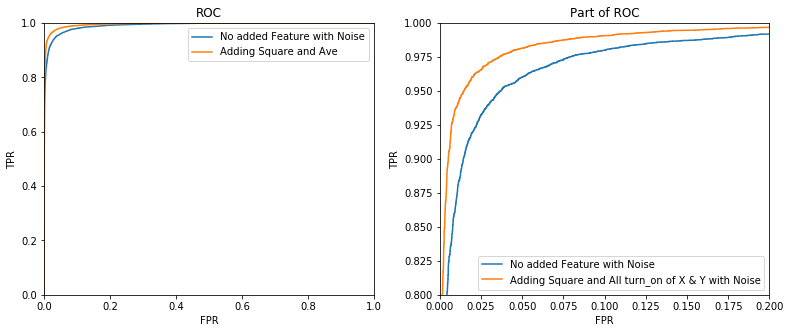

In [28]:
fig3a, axes_arr = plt.subplots(nrows=1, ncols=2,figsize=(13,5))
ax1=axes_arr[0]
ax1.set_title('ROC'); ax1.set_xlabel("FPR"); ax1.set_ylabel("TPR");
ax1.plot(fpr2te,tpr2te, label="No added Feature with Noise")

ax1.plot(fpr3te,tpr3te, label="Adding Square and Ave")

ax1.set_xlim([-0.0, 1.0]);
ax1.set_ylim([-0.0, 1.0]);
ax1.legend();

ax2=axes_arr[1]
ax2.set_title('Part of ROC'); ax2.set_xlabel("FPR"); ax2.set_ylabel("TPR");
ax2.plot(fpr2te,tpr2te, label="No added Feature with Noise")

ax2.plot(fpr3te,tpr3te, label="Adding Square and All turn_on of X & Y with Noise")

ax2.set_xlim([0.0, 0.2]);
ax2.set_ylim([0.8, 1.0]);
ax2.legend();

In [22]:
x_test_NF=genfromtxt('data_sneaker_vs_sandal/x_test.csv', delimiter=',')[1:]
yproba1_test_N = new_lr100.predict_proba(x_test_NF)[:, 1]
np.savetxt('yproba1_test.txt', yproba1_test_N)

Ave Loaded


MXV2_100 Err: 0.44 0.993

In [26]:
x_test_NF=genfromtxt('data_sneaker_vs_sandal/x_test.csv', delimiter=',')[1:]
yproba1_test_N = new_lr3.predict_proba(x_test_NF)[:, 1]
np.savetxt('yproba1_test10.txt', yproba1_test_N)

Ave Loaded


MXV2_2Err: 0.38 0.996133